In [12]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import matplotlib.pyplot as plt
A_to_au_conversion = 1.8897259885789

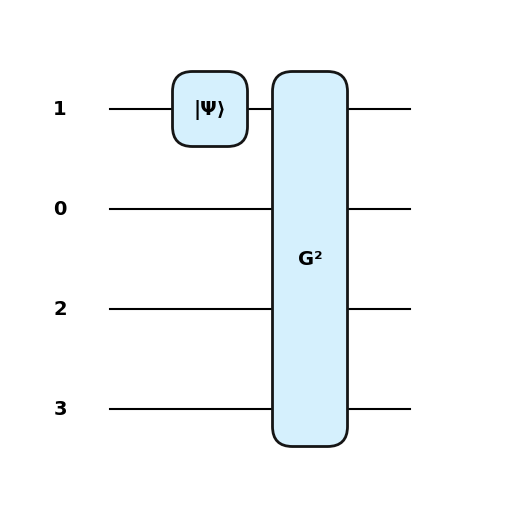

In [14]:
r = 0.742
symbols = ["H", "H"]
geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)

dev = qml.device("lightning.qubit", wires=qubits)
electrons = 4
hf = qml.qchem.hf_state(electrons, qubits)

def circuit(param, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])

qml.drawer.use_style("pennylane")
fig, ax = qml.draw_mpl(circuit)(1, 1)

[1 1 0 0]


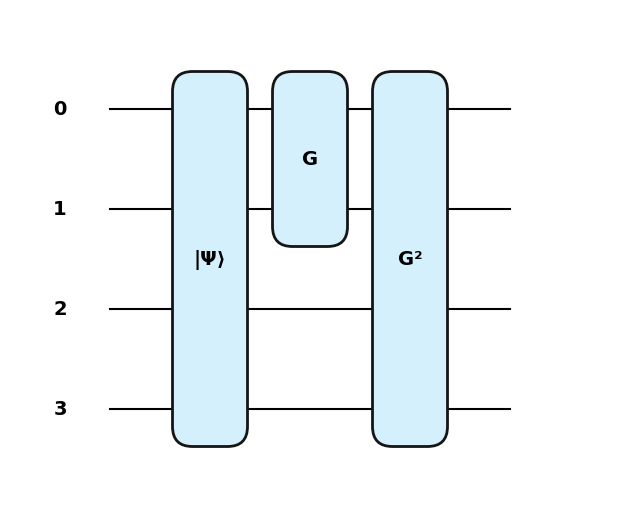

In [22]:
r = 0.742
symbols = ["H", "H"]
geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)

dev = qml.device("lightning.qubit", wires=qubits)
electrons = 2
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)
def circuit(param, wires):
    qml.BasisState(np.array([1,1,0,0]), wires=range(4))
    qml.SingleExcitation(param, wires=[0, 1])
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])

qml.drawer.use_style("pennylane")
fig, ax = qml.draw_mpl(circuit)(4,4)

In [1]:
import pennylane as qml
import numpy as np

dev = qml.device("qiskit.aer", wires=4)

@qml.qnode(dev)
def circuit(weights):
    qml.templates.StronglyEntanglingLayers(weights, wires=[0, 1, 2, 3])
    return qml.expval(qml.PauliX(0) @ qml.PauliZ(2))
weight_shape = qml.templates.StronglyEntanglingLayers.shape(n_layers=2, n_wires=4)
weights = np.random.random(weight_shape)
dev._circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 4/

/home/azhar04/anaconda3/envs/quantum-dev-2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


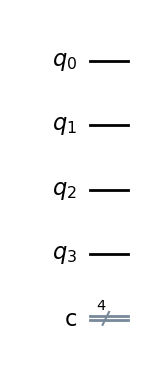

In [2]:
dev._circuit.draw(output="mpl")

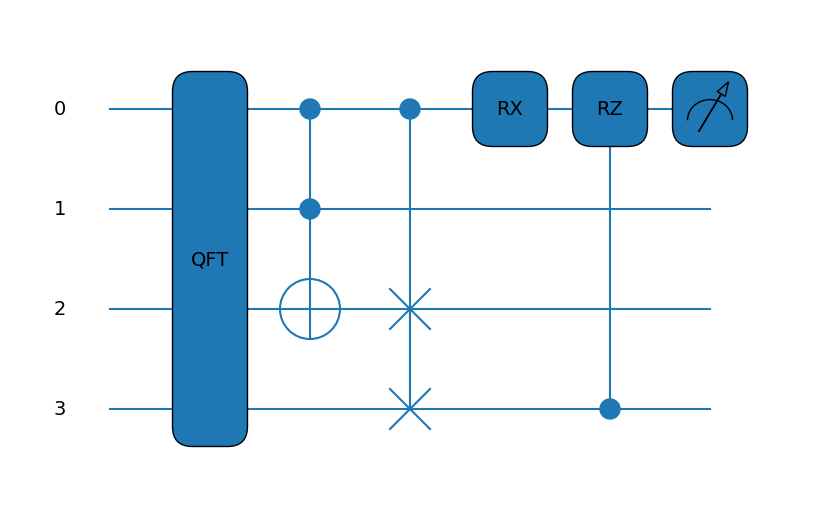

In [6]:
import pennylane as qml
import numpy as np

dev = qml.device("qiskit.aer", wires=4)

@qml.qnode(qml.device('lightning.qubit', wires=(0,1,2,3)))
def circuit(x, z):
    qml.QFT(wires=(0,1,2,3))
    qml.Toffoli(wires=(0,1,2))
    qml.CSWAP(wires=(0,2,3))
    qml.RX(x, wires=0)
    qml.CRZ(z, wires=(3,0))
    return qml.expval(qml.PauliZ(0))

qml.drawer.use_style("default")
fig, ax = qml.draw_mpl(circuit)(1.2345, 1.2345)

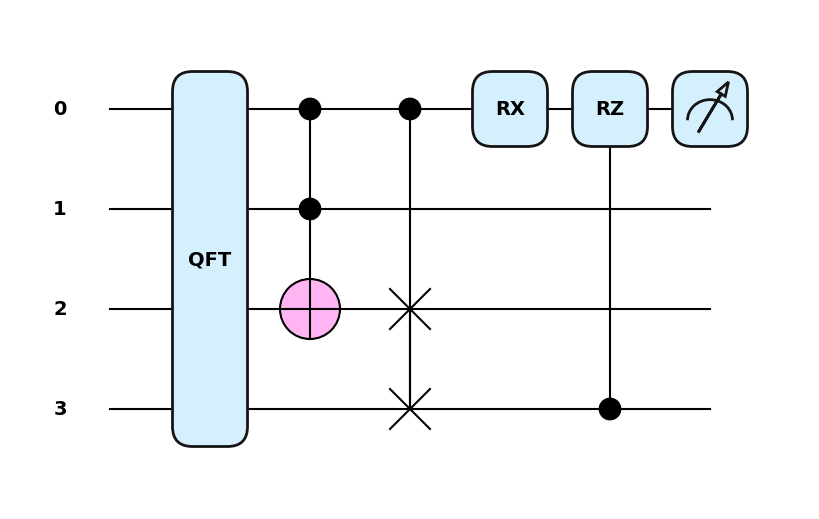

In [9]:
import pennylane as qml
import numpy as np

dev = qml.device("qiskit.aer", wires=4)

@qml.qnode(qml.device('lightning.qubit', wires=(0,1,2,3)))
def circuit(x, z):
    qml.QFT(wires=(0,1,2,3))
    qml.Toffoli(wires=(0,1,2))
    qml.CSWAP(wires=(0,2,3))
    qml.RX(x, wires=0)
    qml.CRZ(z, wires=(3,0))
    return qml.expval(qml.PauliZ(0))

qml.drawer.use_style("pennylane")
fig, ax = qml.draw_mpl(circuit)(1.2345, 1.2345)

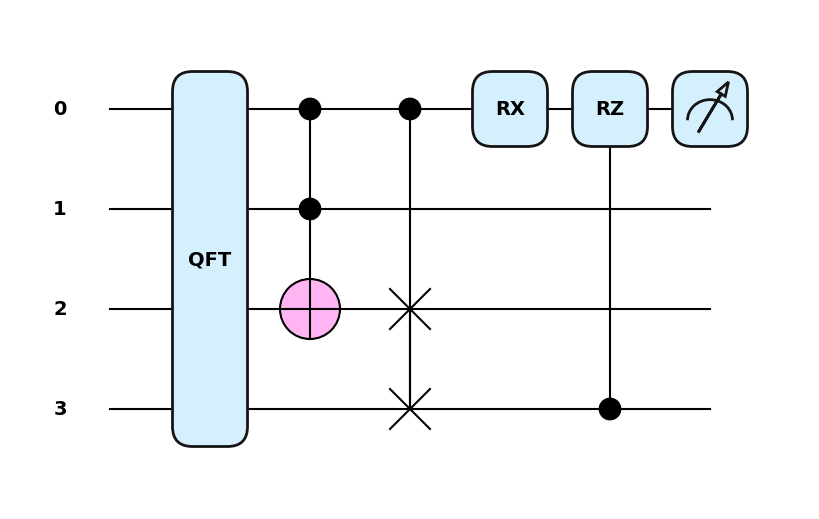

In [10]:
import pennylane as qml
import numpy as np

dev = qml.device("qiskit.aer", wires=4)

@qml.qnode(qml.device('lightning.qubit', wires=(0,1,2,3)))
def circuit(x, z):
    qml.QFT(wires=(0,1,2,3))
    qml.Toffoli(wires=(0,1,2))
    qml.CSWAP(wires=(0,2,3))
    qml.RX(x, wires=0)
    qml.CRZ(z, wires=(3,0))
    return qml.expval(qml.PauliZ(0))

qml.drawer.use_style("pennylane")
fig, ax = qml.draw_mpl(circuit)(1, 1)

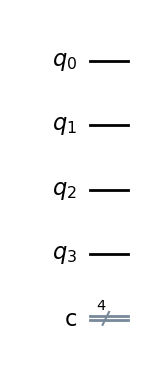

In [4]:
dev._circuit.draw(output="mpl")

step = 0,  E = -1.24654994 Ha
step = 2,  E = -1.27016844 Ha
step = 4,  E = -1.27379541 Ha
step = 6,  E = -1.27434106 Ha
step = 8,  E = -1.27442311 Ha
step = 10,  E = -1.27443547 Ha
step = 12,  E = -1.27443733 Ha
step = 14,  E = -1.27443761 Ha
step = 16,  E = -1.27443765 Ha
step = 18,  E = -1.27443766 Ha
step = 20,  E = -1.27443766 Ha


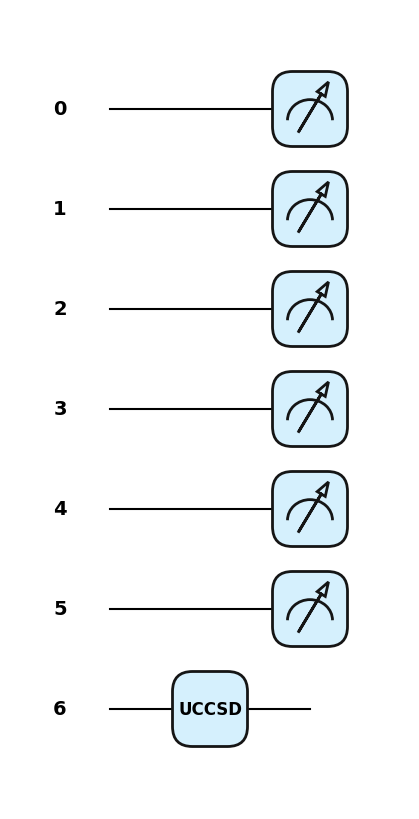

In [27]:
import pennylane as qml
from pennylane import numpy as np

# Define the molecule
symbols  = ['H', 'H', 'H']
geometry = np.array([[0.01076341,  0.04449877,  0.0],
                     [0.98729513,  1.63059094,  0.0],
                     [1.87262415, -0.00815842,  0.0]], requires_grad = False)
electrons = 2
charge = 1

# Build the electronic Hamiltonian
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, charge=charge)

# Define the HF state
hf_state = qml.qchem.hf_state(electrons, qubits)

# Generate single and double excitations
singles, doubles = qml.qchem.excitations(electrons, qubits)

# Map excitations to the wires the UCCSD circuit will act on
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

# Define the device
dev = qml.device("default.qubit", wires=qubits)

# Define the qnode
@qml.qnode(dev)
def circuit(params, wires, s_wires, d_wires, hf_state):
    qml.UCCSD(params, wires, s_wires, d_wires, hf_state)
    return qml.expval(H)


# Define the initial values of the circuit parameters
params = np.zeros(len(singles) + len(doubles))

qml.drawer.use_style("pennylane")
fig, ax = qml.draw_mpl(circuit)(params, qubits, s_wires, d_wires, hf_state)

# Define the optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.5)

# Optimize the circuit parameters and compute the energy
for n in range(21):
    params, energy = optimizer.step_and_cost(circuit, params,
    wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf_state=hf_state)
    if n % 2 == 0:
        print("step = {:},  E = {:.8f} Ha".format(n, energy))